In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
bike_data = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
bike_data.head()

In [ ]:
claim = bike_data.datetime
hora = bike_data.datetime.loc[1]
hora[11]+hora[12] #pega o horário

In [ ]:
def pega_hora(row):
    row.datetime = row.datetime[11]+row.datetime[12]
    return row
bike_data.apply(pega_hora, axis='columns')
# não alterou a table original
new_bike_data = bike_data.apply(pega_hora, axis='columns')

In [37]:
bike_sorted = bike_data.sort_values(by='datetime',ascending=True)

In [36]:
new_bike_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [84]:
#começo do randomflorest
y = new_bike_data['count']
new_bike_data_features = ['datetime','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered']
X = new_bike_data[new_bike_data_features]
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [95]:
from sklearn.tree import DecisionTreeRegressor

bike_model = DecisionTreeRegressor()
bike_model.fit(X, y)

DecisionTreeRegressor()

In [96]:
from sklearn.metrics import mean_absolute_error

predicted_bike = bike_model.predict(X)
mean_absolute_error(y, predicted_bike)

0.0

In [97]:
from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

bike_model.fit(train_X, train_y)

val_predictions = bike_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

2.9515062454077885


In [99]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
bike_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, bike_preds))

1.2117083027185895


In [104]:
y.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

<AxesSubplot:xlabel='temp', ylabel='count'>

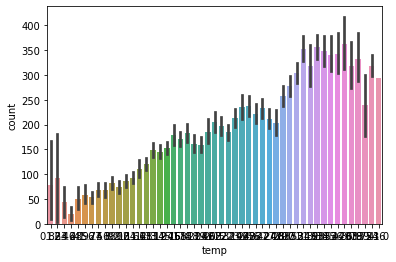

In [105]:
#firulas gráficas
sns.barplot(x=bike_data['temp'], y=bike_data['count'])

<AxesSubplot:xlabel='humidity', ylabel='count'>

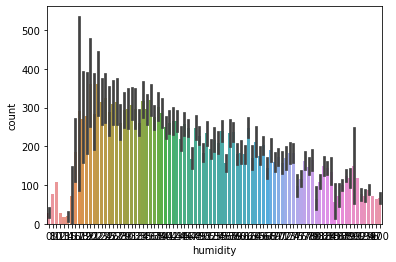

In [106]:
sns.barplot(x=bike_data['humidity'], y=bike_data['count'])

<AxesSubplot:xlabel='datetime', ylabel='count'>

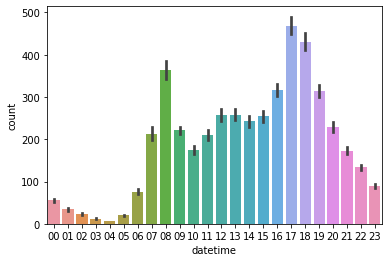

In [107]:
sns.barplot(x=new_bike_data['datetime'], y=bike_data['count'])